In [13]:
import pandas as pd
import numpy as np
from sklearn import * 
import matplotlib.pyplot as plt

from mlxtend.plotting import plot_decision_regions

%matplotlib inline

In [2]:
df = pd.read_csv("/data/iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.Species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [5]:
features = ["SepalLengthCm", "PetalLengthCm"]

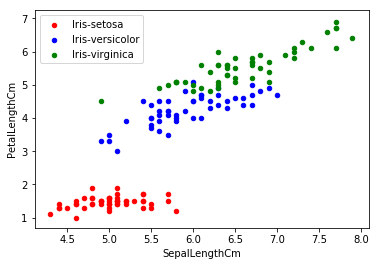

In [9]:
fig, ax = plt.subplots()
colors = ["red", "blue", "green"]
for i, v in enumerate(df.Species.unique()):
    df1 = df[features][df.Species == v]
    df1.plot.scatter(0, 1, ax = ax, color = colors[i], label = v)
plt.legend()

training accuracy: 1.0
test accuracy: 0.9777777777777777


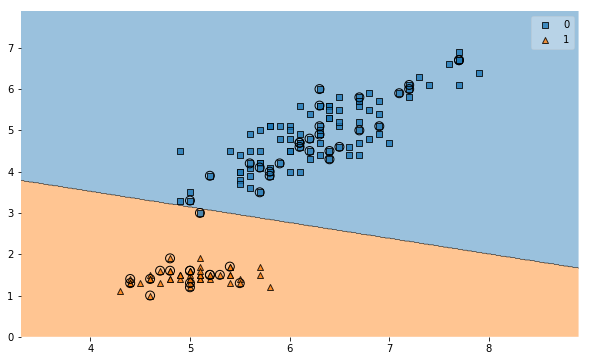

In [19]:
y = np.where(df.Species == "Iris-setosa", 1, 0)
X = df[features]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X.values.astype("float")
                                    , y , test_size = 0.3, random_state = 1234)


pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est",linear_model.LogisticRegression(solver = "liblinear"))
])
pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("training accuracy:", metrics.accuracy_score(y_train, y_train_pred))
print("test accuracy:", metrics.accuracy_score(y_test, y_test_pred))

plt.figure(figsize = (10, 6))
plot_decision_regions(X.values, y, pipe, X_highlight=X_test)


training accuracy: 0.9428571428571428
test accuracy: 0.9777777777777777


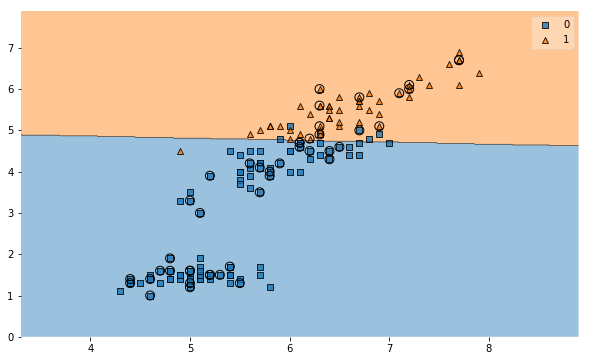

In [20]:
y = np.where(df.Species == "Iris-virginica", 1, 0)
X = df[features]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X.values.astype("float")
                                    , y , test_size = 0.3, random_state = 1234)


pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est",linear_model.LogisticRegression(solver = "liblinear"))
])
pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("training accuracy:", metrics.accuracy_score(y_train, y_train_pred))
print("test accuracy:", metrics.accuracy_score(y_test, y_test_pred))

plt.figure(figsize = (10, 6))
plot_decision_regions(X.values, y, pipe, X_highlight=X_test)


training accuracy: 0.9523809523809523
test accuracy: 0.9555555555555556


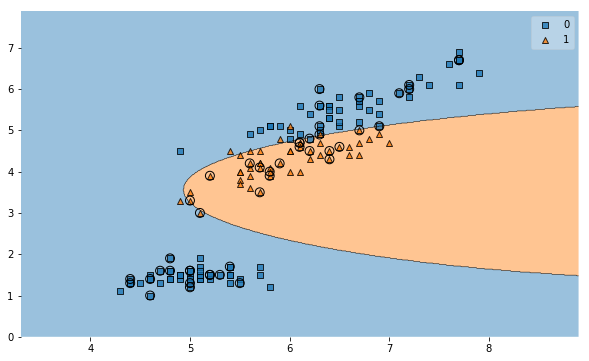

In [23]:
y = np.where(df.Species == "Iris-versicolor", 1, 0)
X = df[features]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X.values.astype("float")
                                    , y , test_size = 0.3, random_state = 1234)


pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=3, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est",linear_model.LogisticRegression(solver = "liblinear"))
])
pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("training accuracy:", metrics.accuracy_score(y_train, y_train_pred))
print("test accuracy:", metrics.accuracy_score(y_test, y_test_pred))

plt.figure(figsize = (10, 6))
plot_decision_regions(X.values, y, pipe, X_highlight=X_test)


training accuracy: 0.9714285714285714
test accuracy: 0.9333333333333333


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


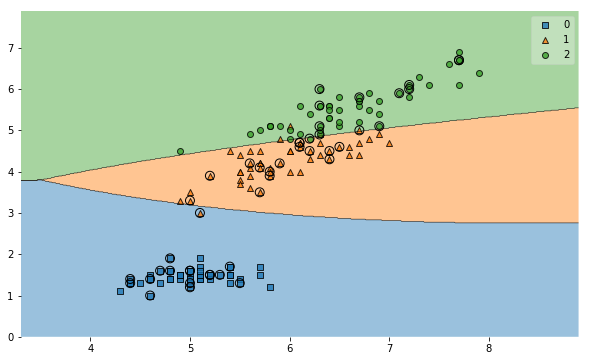

In [24]:
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(df.Species)
X = df[features]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X.values.astype("float")
                                    , y , test_size = 0.3, random_state = 1234)


pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=3, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est",linear_model.LogisticRegression(solver = "liblinear"))
])
pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("training accuracy:", metrics.accuracy_score(y_train, y_train_pred))
print("test accuracy:", metrics.accuracy_score(y_test, y_test_pred))

plt.figure(figsize = (10, 6))
plot_decision_regions(X.values, y, pipe, X_highlight=X_test)


In [29]:
y_test_prob = pipe.predict_proba(X_test)
y_test_prob

array([[2.98660716e-02, 6.27063359e-01, 3.43070569e-01],
       [2.15362539e-02, 5.59735483e-01, 4.18728263e-01],
       [1.22021353e-03, 1.62422277e-01, 8.36357510e-01],
       [9.00274336e-01, 9.85223036e-02, 1.20336032e-03],
       [2.04849790e-01, 6.79096506e-01, 1.16053704e-01],
       [8.66161155e-01, 1.32523034e-01, 1.31581105e-03],
       [8.52841094e-01, 1.46582353e-01, 5.76552887e-04],
       [9.08838944e-01, 9.06006740e-02, 5.60382293e-04],
       [1.23675268e-01, 7.50085451e-01, 1.26239281e-01],
       [1.89179106e-05, 1.16747104e-02, 9.88306372e-01],
       [1.81349361e-01, 7.59191430e-01, 5.94592082e-02],
       [9.20902631e-01, 7.76839205e-02, 1.41344820e-03],
       [1.89179106e-05, 1.16747104e-02, 9.88306372e-01],
       [9.46377251e-02, 7.66079993e-01, 1.39282282e-01],
       [8.47896596e-01, 1.51236993e-01, 8.66411154e-04],
       [3.32668892e-01, 6.49160709e-01, 1.81703989e-02],
       [3.80540770e-04, 6.52253119e-02, 9.34394147e-01],
       [8.47896596e-01, 1.51236

In [30]:
np.argmax(y_test_prob, axis = 1)

array([1, 1, 2, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1,
       1, 1, 2, 0, 2, 1, 2, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 1, 0, 1, 0, 2,
       2])

In [31]:
y_test_pred

array([1, 1, 2, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1,
       1, 1, 2, 0, 2, 1, 2, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 1, 0, 1, 0, 2,
       2])

In [32]:
label_encoder.inverse_transform(y_test_pred)

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica'], dtype=object)